In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import TridiagonalMatrixHandler as tmh
from numba import njit
import math
import importlib
importlib.reload(tmh)

<module 'TridiagonalMatrixHandler' from '/Users/o.peretyatko/Study/university/Diplom/TridiagonalMatrixHandler.py'>

In [15]:
%matplotlib notebook

# $$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2} + au(1-\frac{I(u)}{C(I)}) - σu;$$
# $$u(x,0)=e^{-x^2}; \qquad x∈(0,L);$$
# $$\frac{\partial u}{\partial x}|_{x=0,L} = 0;$$

$$F(u)=au^k_j\cdot(1-\frac{I(u^{k}_j)}{C(I)})- \sigma u^{k}_j$$
$$где\qquad C(I)=C(I(u))=K + K_1I(u); \qquad I=I(u) = \int_0^L u(x,t)dx.$$

In [16]:
K0 = 100 #Растет высоко
K1 = 1

# K0 = 7 #дорастает и останавливается ~(0.1, 0.2)
# K1 = 0.1

# K0 = 2  # Зависает
# K1 = 2

# K0 = 0.1
# K1 = 1 при смерти 0 не очень стремительно растет вверх

# K0 = 30  # Быстро и высоко растет
# K1 = 3 # графики встречаются в точке (-30, -60)

@njit
def carryingCapacityFunction(u1, i, u_0):
    integ_tmp = tmh.numbaQuad(u_0)
    K = K0 + K1*integ_tmp
    return integ_tmp/K

u = tmh.createAndSolveUByYavnayMethods(carryingCapacityFunction)
print(u.max())

1.0


	Коэффициент миграции (D) = 0.01	Рождения новых людей (a) = 0
			Смертность населения (σ) = 0.75

	Количество точек по ОХ (N) = 1000	Количество точек по T (KT) = 10000
	Конец отрезка по OX (L) = 100	Конечный момент (T) = 1000

		число Куранта = 0.09980009999999999	Система устойчивая


<IPython.core.display.Javascript object>


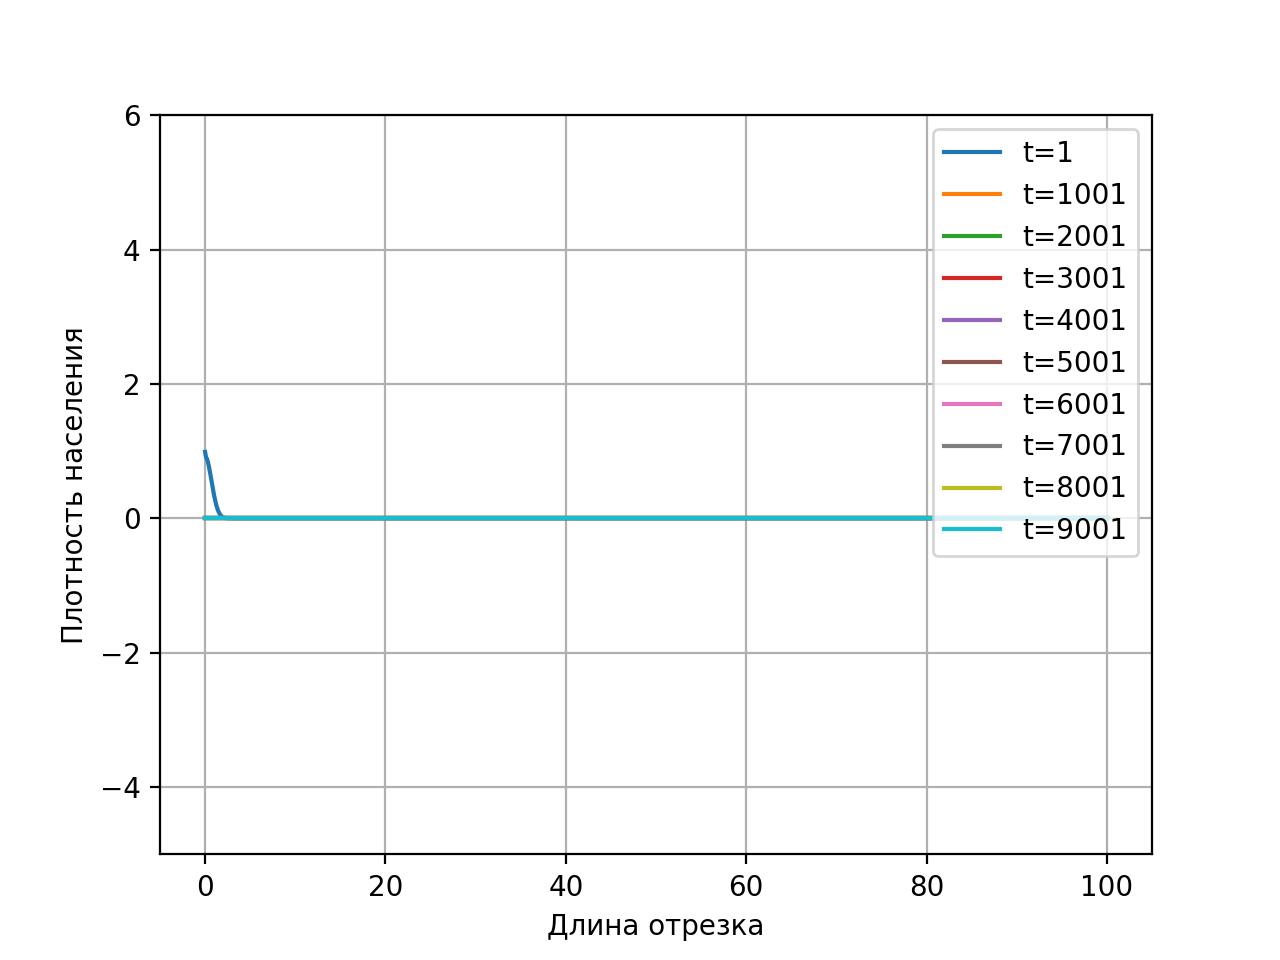

In [20]:
x=tmh.x

tmh.showAllConstant()

# fig = plt.figure(facecolor='white')
# ax = plt.axes(xlim=(0, tmh.L), ylim=(0, u.max() + 1) )
# line, = ax.plot([ ], [ ], lw=3)
# def redraw(i):
#     line.set_data(x, u[:,i])
#     string = 'Время:'+str(i)
#     plt.suptitle(string)
# anim = animation.FuncAnimation(fig,redraw,frames=tmh.KT,interval=1)


ax = plt.axes(xlim=(-5, tmh.L+5), ylim=(-5, u.max()+5) )
for i in range(1, tmh.KT, 1000):
    #plt.plot(t, u[:,i], label='t='+str(i))
    plt.plot(x, u[:,i], label='t='+str(i))
plt.legend(loc='best')

ax.set_xlabel('Длина отрезка')
ax.set_ylabel('Плотность населения')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [88]:
NX = tmh.NX
KT = tmh.KT
tau = tmh.tau
x_coor = int(NX * 2)
t_coor = int(3)
umax = u.max()
accuracy = 0.2
value = 0
tau_count = 1
while x_coor == NX * 2 and t_coor < KT  :
    for i in range(0, NX - 1):
        if u[i, t_coor] != umax and u[i, t_coor] > umax / 10:
            x_coor = i
    if x_coor == NX * 2:
        t_coor = t_coor + 1

if (x_coor < int(NX * 2)):
    while value / tau_count * tau == 0 and t_coor+tau_count < KT :
        for i in range(1, NX - 1):
            if abs(u[x_coor, t_coor] - u[i, t_coor + tau_count]) < accuracy and x[x_coor] != x[i]:
                accuracy = abs(u[x_coor, t_coor] - u[i, t_coor + tau_count])
                value = abs(x_coor - x[i])
        if value / tau_count * tau == 0:
            tau_count = tau_count + 1
    speed = value / tau_count * tau
else :
    speed = 0
print (speed)

0.014994994994994995


In [65]:
real_speed = 2 * math.sqrt(tmh.D * (tmh.birthKoeff - tmh.deathKoeff))
print(real_speed)

0.17320508075688773
